#**Laboratorio N° 05 - Parte práctica**

*   La evaluación es estrictamente personal.
*   El formato de entrega válido es Lab5_CÓDIGOPUCP.ipynb, donde CÓDIGOPUCP es su código de alumno. De entregar en cualquier otro formato, se penalizará con un descuento de 2 puntos.

##**Pregunta 1** (15 pts)

El algoritmo llamado Moving Average calcula el promedio de una ventana de elementos consecutivos en un arreglo y genera un nuevo arreglo donde cada elemento es el promedio de los valores contiguos dentro de la ventana especificada.

A continuación, se presenta un ejemplo. A partir de dicho ejemplo, deberá deducir la lógica a aplicar:

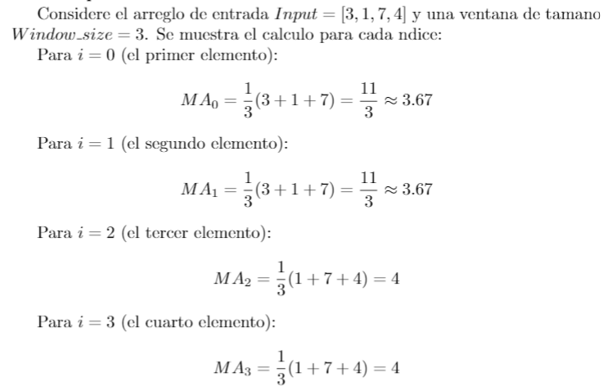

A continuación, se muestran los nombres de las variables a utilizar en el desarrollo del problema:



*   Vin: Arreglo de entrada (INT) con valores generados aleatoriamente entre 0 y 100.
*   N: Tamaño del arreglo de entrada
*   W: Tamaño de la ventana
*   Vout: Arreglo de salida (FLOAT)





1. (1 pts) Crear una función en C llamada Moving_Average_C que desarrolle el algoritmo propuesto.

In [77]:
%%file moving_average.c

void Moving_Average_C(int *Vin, int N, int W, float *Vout)
{
    int mov;
    W = 3;
    N = sizeof(Vin);
    mov = (W-1)/2;
    for(int j = 0; j < N; j++){
        float suma=0;

        for(int k=0;k < W; k++){
          if(j-mov<0){
              suma = suma + Vin[k];
          }
          else if(j+mov>(N-1)){
              suma = suma + Vin[j-k];
          }
          else{
              for(int i=1;i<mov+1;i++){
                  float suma1 = suma1 + Vin[j-i] + Vin[j+i];
                  suma = Vin[j] + suma1;
              }
          }
        }
        float sumaProm = suma/W;
        Vout[j] = sumaProm;
     }
}

Overwriting moving_average.c


2. (1 pts) Crear una función en Python llamada Moving_Average_Py_No_Numpy que desarrolle el algoritmo propuesto sin utilizar numpy.

In [76]:
def Moving_Average_Py_No_Numpy(Vin, N, W):
    i = 0
    sum = 0
    for i in range(K):
        sum += Vin[i]

    # Compute MA from index K
    for i in range(W, N):
        sum -= Vin[i - W]
        sum += Vin[i]
        Vout[i] = sum / W

3. (1 pts) Crear una función en Python llamada Moving_Average_Py_Numpy que desarrolle el algoritmo propuesto utilizando numpy.

In [75]:
import numpy as np
def Moving_Average_Py_Numpy(Vin, N, W):
    i = 0
    Vout = []
    while i < N - W + 1:

        promedio = round(np.sum(Vin[i:i+W]) / W, 2)
        Vout.append(promedio)
        i += 1


4. (3 pts) Validar el funcionamiento de las 3 funciones haciendo uso de Ctypes para N = 16.

In [60]:
! gcc -fPIC -shared moving_average.c -o moving_average.so

In [74]:
import ctypes
import matplotlib.pyplot as plt
import numpy as np
def Moving_Average_Py_No_Numpy(Vin, N, W):
    i = 0
    sum = 0
    for i in range(K):
        sum += Vin[i]

    # Compute MA from index K
    for i in range(W, N):
        sum -= Vin[i - W]
        sum += Vin[i]
        Vout1[i] = sum / W
        return Vout1

def Moving_Average_Py_Numpy(Vin, N, W):
    i = 0
    Vout2 = []
    while i < N - W + 1:

        promedio = round(np.sum(Vin[i:i+W]) / W, 2)
        Vout.append(promedio)
        i += 1
    return Vout2

def ctypes_Moving_Average():
    libfile = './moving_average.so'
    lib = ctypes.CDLL(libfile)
    lib.Moving_Average_C.argtypes = [np.ctypeslib.ndpointer(dtype = np.int),ctypes.c_int,ctypes.c_int, ctypes.c_int, np.ctypeslib.ndpointer(dtype = np.float)]
    return lib.Moving_Average_C

c_Moving_Average = ctypes_Moving_Average()

N=16
W=7


c_Moving_Average(Vin,N,W,Vout)
Moving_Average_Py_No_Numpy(Vin, N, W)
Moving_Average_Py_Numpy(Vin, N, W)


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

5. (4 pts) Realizar el análisis temporal de ejecución para los tamaños de matriz N = {16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384}. Debe generar una gráfica con los tiempos de ejecución para cada N analizando las 3 funciones. Considerar que para cada ejecución debe iterar 19 veces y debe tomar el valor más representativo (mediana).

In [73]:
import ctypes
import time
import matplotlib.pyplot as plt
import statistics
import numpy as np
def Moving_Average_Py_No_Numpy(Vin, N, W):
    i = 0
    sum = 0
    for i in range(K):
        sum += Vin[i]

    # Compute MA from index K
    for i in range(W, N):
        sum -= Vin[i - W]
        sum += Vin[i]
        Vout1[i] = sum / W
        return Vout1

def Moving_Average_Py_Numpy(Vin, N, W):
    i = 0
    Vout2 = []
    while i < N - W + 1:

        promedio = round(np.sum(Vin[i:i+W]) / W, 2)
        Vout.append(promedio)
        i += 1
    return Vout2

if __name__ == '__main__':
    lib = ctypes.CDLL('./moving_average.so')
    lib.Moving_Average_C.argtypes = [np.ctypeslib.ndpointer(dtype = np.int),ctypes.c_int,ctypes.c_int, ctypes.c_int, np.ctypeslib.ndpointer(dtype = np.float)]
    N = {16,32,64,128,256,512,1024,2048,4096,8192,16384}
    iter = 19
    lista_c = []
    lista_py_no_numpy= []
    lista_py_numpy= []
    for it in range(iter):
        tic = time.perf_counter()
        lib.euler(N)
        toc = time.perf_counter()
        lista_c.append((toc-tic)*1e6)
        tic = time.perf_counter()
        euler(N)
        toc = time.perf_counter()
        lista_py.append((toc-tic)*1e6)
        tic = time.perf_counter()
        lib.euler(N)
        toc = time.perf_counter()
        lista_c.append((toc-tic)*1e6)

    print(statistics.median(lista_c))
    print(statistics.median(lista_py_no_numpy))
    print(statistics.median(lista_py_numpy))

    plt.plot(lista_c)
    plt.plot(lista_py_no_numpy)
    plt.plot(lista_py_numpy)
    plt.grid()
    plt.legend(["Time C","Time Python No Numpy","Time Python Numpy"])
    plt.xlabel("Iteraciones")
    plt.ylabel("Tiempo [us]")

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

6. (2 pts) Crear un archivo bash que ejecute todos los programas e incluya las reglas de compilación.

7. (1 pts) ¿Qué función presenta el mejor rendimiento? ¿Por qué? Justifique su respuesta.

8. (2 pts) Explicar el impacto de la memoria caché en sus resultados